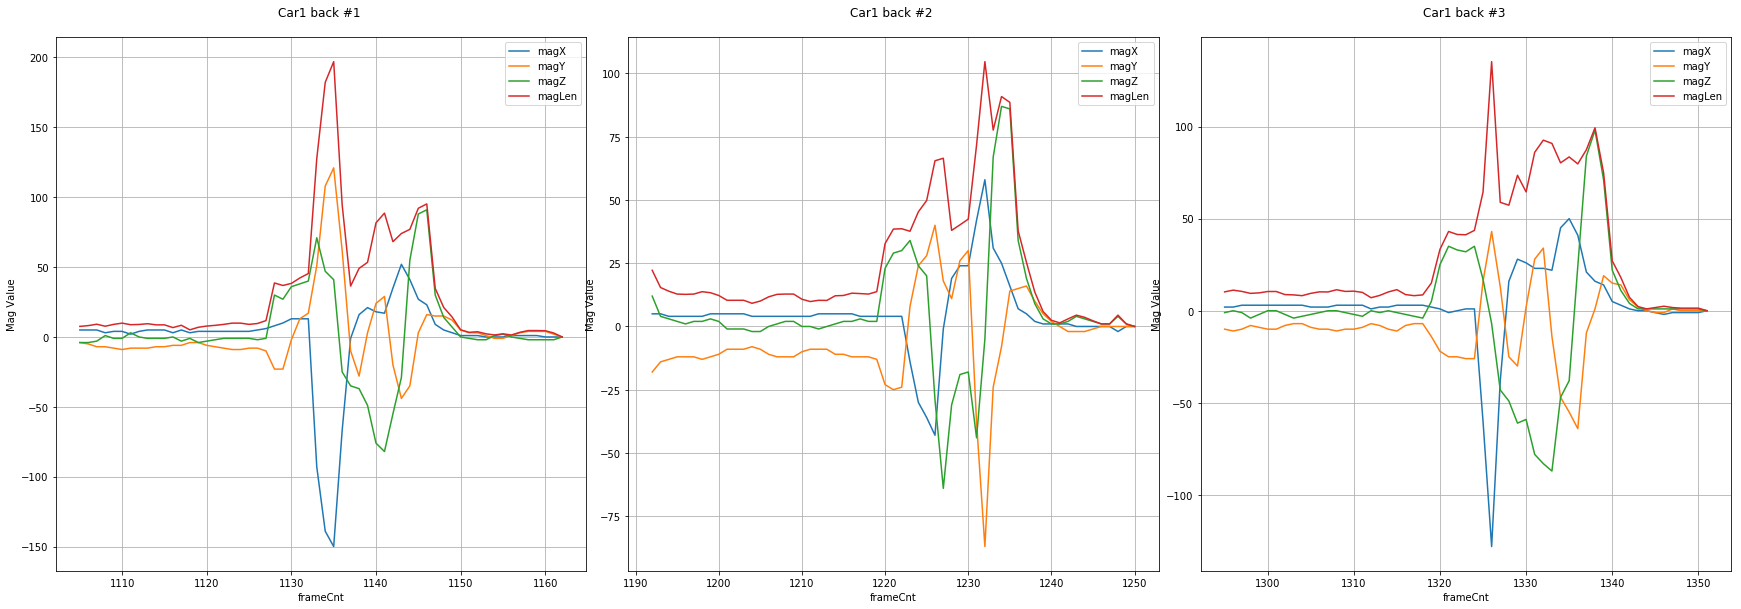

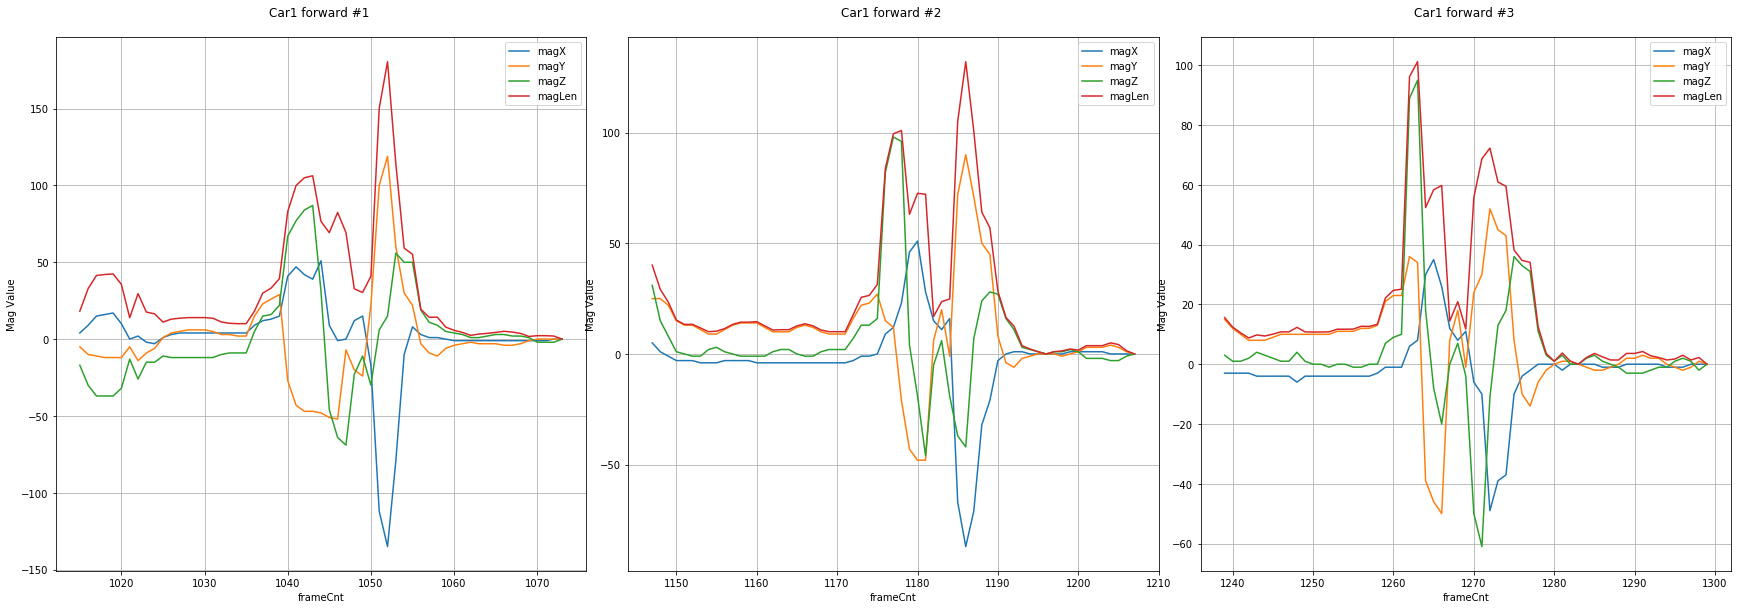

In [63]:
import requests
import json
import time
import hashlib
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import math
from os import listdir
from os.path import isfile, join

def fast_plot_line(figure, axis, index, time , x, y, z, length ,title, ylimit):
    axis[index].plot()
    axis[index].plot(time, x, label='magX')
    axis[index].plot(time, y, label='magY')
    axis[index].plot(time, z, label='magZ')
    axis[index].plot(time, length, label='magLen')
    axis[index].set_xlabel('frameCnt')
    axis[index].set_ylabel('Mag Value')
    axis[index].set_title(title)
    axis[index].legend()
    axis[index].grid()
    if ylimit:
        axis[index].set_ylim([-100, 100])
    return None

lineName = "right line"
# lineName = "middle line"
# lineName = "left line"

carFolderName = "car1 RV"
# carFolderName = "car2 colt plus"

folderName = "170801 Gemtek/" + carFolderName + "/" + lineName + "/"

carName = "car2_colt_plus"

csvFiles = [f for f in listdir(folderName) if isfile(join(folderName, f)) and f[-3:] == "csv" ]
backFiles = [f for f in csvFiles if f[0:4] == "BACK"]
forwardFiles = [f for f in csvFiles if f[0:7] == "FORWARD"]
imageName = folderName + "car1_RV.png"

plotNum = len(backFiles)
f, ax = plt.subplots(figsize = (8*plotNum,8), ncols= plotNum)
f.tight_layout()

for i in range(plotNum):  
    csvFileName = folderName + backFiles[i]
    df = pd.read_csv(csvFileName, encoding='utf_8_sig')
    fast_plot_line(f, ax, i, df.frameCnt ,  df.magX_WO_offset,  df.magY_WO_offset, 
                   df.magZ_WO_offset, df.mag_len_WO_offset , 'Car1 back #' + str(i+1) +' \n ', ylimit = None)
    
imageName = folderName + carName + "_BACK"+".png"
f.savefig(imageName ,bbox_inches='tight', dpi=200)

plotNum = len(forwardFiles)
f, ax = plt.subplots(figsize = (8*plotNum,8), ncols= plotNum)
f.tight_layout()

for i in range(len(backFiles)):  
    csvFileName = folderName + forwardFiles[i]
    df = pd.read_csv(csvFileName, encoding='utf_8_sig')
    fast_plot_line(f, ax, i, df.frameCnt ,  df.magX_WO_offset,  df.magY_WO_offset, 
                   df.magZ_WO_offset, df.mag_len_WO_offset , 'Car1 forward #' + str(i+1) +' \n ', ylimit = None)
    
imageName = folderName + carName + "_FORWARD"+".png"
f.savefig(imageName ,bbox_inches='tight', dpi=200)


In [57]:
forwardFiles

['FORWARD_R_1.csv', 'FORWARD_R_2.csv']

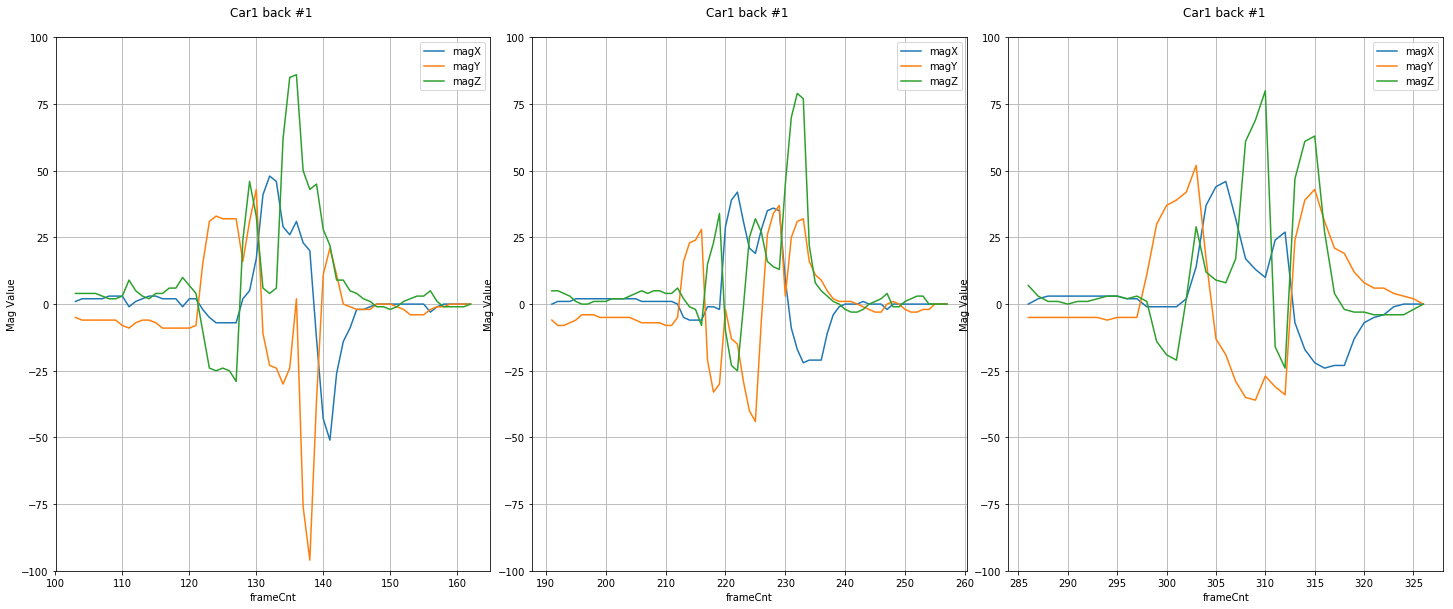

In [21]:
f, ax = plt.subplots(figsize = (20,8), ncols= 3)
f.tight_layout()

fast_plot_line(f, ax, 0, df1.frameCnt ,  df1.magX_WO_offset,  df1.magY_WO_offset, df1.magZ_WO_offset, 'Car1 back #1 \n ')
fast_plot_line(f, ax, 1, df2.frameCnt ,  df2.magX_WO_offset,  df2.magY_WO_offset, df2.magZ_WO_offset, 'Car1 back #2 \n ')
fast_plot_line(f, ax, 2, df3.frameCnt ,  df3.magX_WO_offset,  df3.magY_WO_offset, df3.magZ_WO_offset, 'Car1 back #3 \n ')
f.savefig(imageName2 ,bbox_inches='tight', dpi=200)